In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from scipy.stats import shapiro


2023-01-17 21:05:06.958791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 21:05:07.025248: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-17 21:05:07.025259: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-17 21:05:07.472776: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
csv = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)

In [3]:
csv.columns=["Age",'Gender','Tb_Bilirubin','DB_Bilirubin','Alkaline_Phosphotase','sgpt ','Sgot','Protiens','Albumin','Albumin_Globulin','Disease']

#Missing Values
csv.info()
csv.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      579 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                     0
Gender                  0
Tb_Bilirubin            0
DB_Bilirubin            0
Alkaline_Phosphotase    0
sgpt                    0
Sgot                    0
Protiens                0
Albumin                 0
Albumin_Globulin        4
Disease                 0
dtype: int64

In [4]:
csv['Albumin_Globulin'] = csv['Albumin_Globulin'].fillna(csv['Albumin_Globulin'].mean())
csv.info()
csv.isna().sum()
csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      583 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


,Age,Gender,Tb_Bilirubin,DB_Bilirubin,Alkaline_Phosphotase,sgpt,Sgot,Protiens,Albumin,Albumin_Globulin,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
#Replace Female with 1 and Male with 0
csv=csv.replace(regex=['Female'],value='1')
csv=csv.replace(regex=['Male'],value='0')

csv


,Age,Gender,Tb_Bilirubin,DB_Bilirubin,Alkaline_Phosphotase,sgpt,Sgot,Protiens,Albumin,Albumin_Globulin,Disease
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
#REPLACE 2->1 AND 1->0 
#0=> nonLiver Patience
#1=> Liver patience
#csv['Disease'].replace(to_replace = 1, value = 0, inplace=True)
#csv['Disease'].replace(to_replace = 2, value = 1, inplace=True)

csv

#Age
resp_age,resp_Tb_Bilirubin=csv.Age,csv.Tb_Bilirubin
shapiro(resp_Tb_Bilirubin)[1]
#Gender


1.5773978206485132e-38

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tb_Bilirubin'}>,
        <AxesSubplot: title={'center': 'DB_Bilirubin'}>],
       [<AxesSubplot: title={'center': 'Alkaline_Phosphotase'}>,
        <AxesSubplot: title={'center': 'sgpt '}>,
        <AxesSubplot: title={'center': 'Sgot'}>],
       [<AxesSubplot: title={'center': 'Protiens'}>,
        <AxesSubplot: title={'center': 'Albumin'}>,
        <AxesSubplot: title={'center': 'Albumin_Globulin'}>]],
      dtype=object)

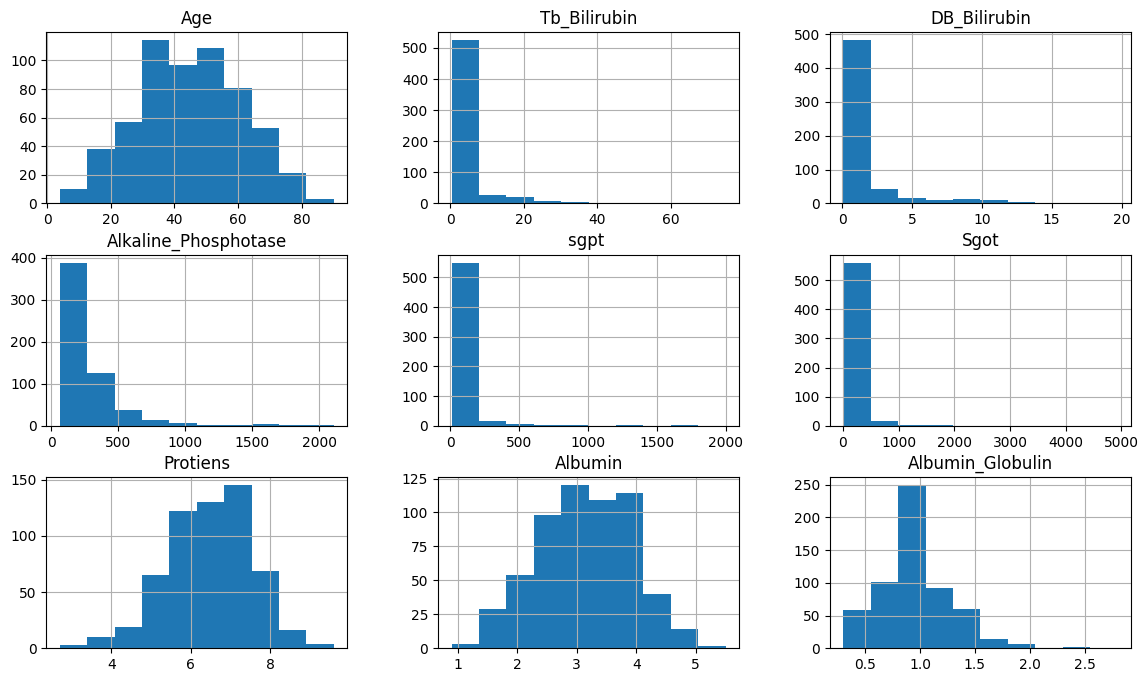

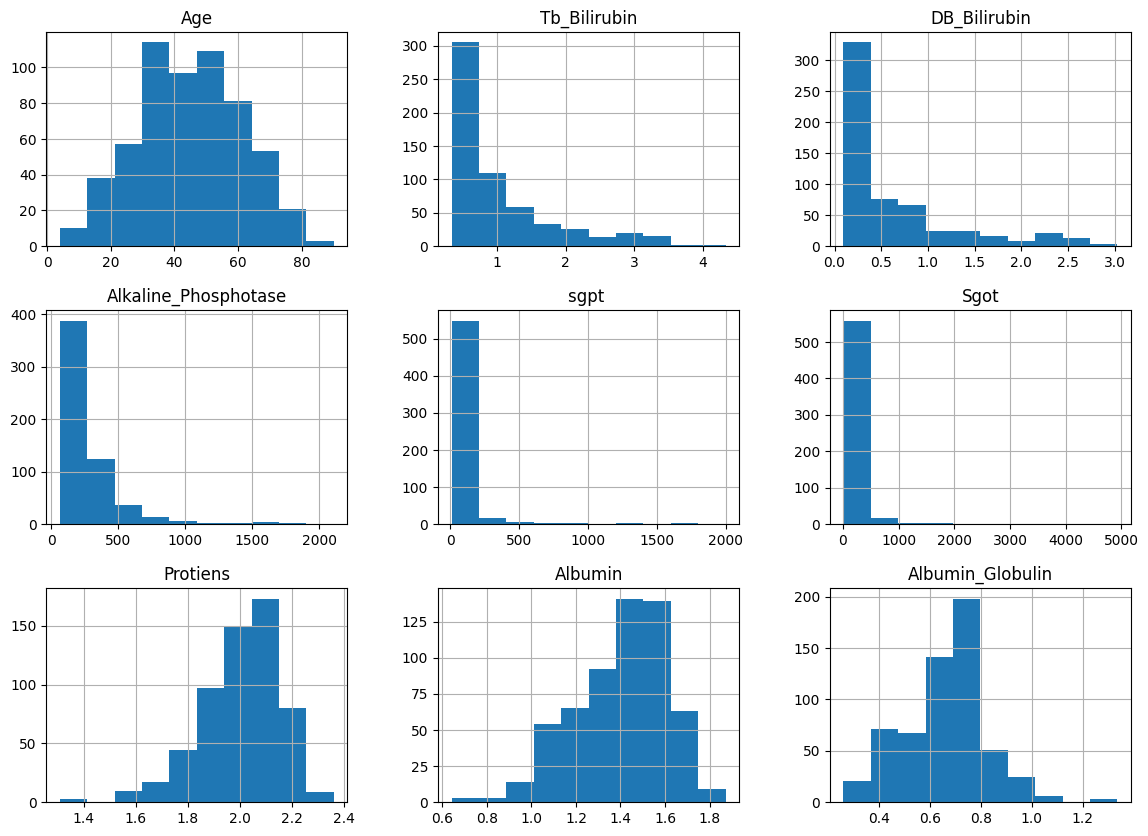

In [7]:
#Create Input && output data 
X_data = csv.drop('Disease',axis=1)
Y_data = csv['Disease']

# Visualize skewed continuous features of original data

X_data.hist(figsize=(14,8))


# Skewed features are Albumin, Direct Bilirubin, A/G ratio, Tota Bilirubin, Total Protein 
#Log-transform the skewed features but also include zero values)
skewed = ['Albumin', 'DB_Bilirubin', 'Tb_Bilirubin', 'Albumin_Globulin', 'Protiens']
X_data[skewed] = X_data[skewed].apply(lambda x: np.log(x + 1))
X_data[skewed] = X_data[skewed]
# Visualize the new log distributions
X_data.hist(figsize=(14,10))

In [8]:
# : One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(X_data)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(Y_data)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
print (disease[1])


11 total features after one-hot encoding.
['Age', 'Tb_Bilirubin', 'DB_Bilirubin', 'Alkaline_Phosphotase', 'sgpt ', 'Sgot', 'Protiens', 'Albumin', 'Albumin_Globulin', 'Gender_0', 'Gender_1']
2 disease columns after one-hot encoding.
0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: 1, Length: 583, dtype: uint8


In [9]:

#split dataset to train and test data 
X_train,X_test,Y_train,Y_test =train_test_split(X_data,Y_data,test_size=0.25)

def preprocessing(X_train,Y_train,X_test,Y_test,type="MinMax"):

            #NORMALIZATION#
    if type == "Normalization":
        X_train_normalized = tf.keras.utils.normalize(X_train)
        X_test_normalized = tf.keras.utils.normalize(X_test)
        return X_train_normalized,Y_train,X_test_normalized,Y_test

            #NORM-WITH MINMAX#
    elif type == "MinMax":
        scaler = MinMaxScaler(feature_range=(-1, 1))
        X_train_minmax = scaler.fit_transform(X_train)
        X_test_minmax = scaler.fit_transform(X_test)
        return X_train_minmax , Y_train ,X_test_minmax ,Y_test

X_train_minmax,Y_train,X_test_minmax,Y_test=preprocessing(X_train,Y_train,X_test,Y_test,type="MinMax")
print(X_train_minmax.shape,X_test_minmax.shape,Y_train.shape,Y_test.shape)


(437, 10) (146, 10) (437,) (146,)


In [10]:
#Function to perform 5 Folds Cross-Validation

kf = KFold(n_splits=5)


def cross_validation(model, _X, _y, _cv=kf):
     #_X array input values
     #_Y out labels
     #cv Determines the number of folds for cross-validation.
     
      _scoring = ['accuracy', 'precision', 'recall', 'f1']

      #Model Training and validation with repeating
      results = cross_validate(estimator=model, X=_X,y=_y,cv=kf,scoring=_scoring,return_train_score=True,verbose=1)
      #Elegxoume tin apododsi pou petuxenei me ta test dedomena pou eginan split apo to kfold
      y_pred = cross_val_predict(model, X_train_minmax,  Y_train, cv=5)
      #pairnoume to accuracy 
      accuracy = accuracy_score(Y_train, y_pred)
      #Geometric mean score
      geom_mean_score=geometric_mean_score(Y_train, y_pred)


      #Fit model without repeating (test prediction with split_testdata)
      model.fit(X_train_minmax,Y_train)
      test_pred = model.predict(X_test_minmax)
      test_accuracy=accuracy_score(Y_test,test_pred)

      print("REPORT CLASSIFICATION FOR train data with repeating 5fold:",classification_report(Y_train,y_pred))
      #info

      #Costum geometric mean calculation:
      sensitivity = recall_score(Y_train , y_pred,average='macro')
      specificity = recall_score(np.logical_not(Y_train) , np.logical_not(y_pred) , average='macro')
      geom_costum_score=sensitivity*specificity

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "geometric_mean_score":geom_mean_score,
              "Test_accuracy_score":test_accuracy,
              "Y_pred":y_pred,
              "geom_costum_score":geom_costum_score
      }


In [11]:
#'Function to plot a grouped bar chart showing the training and validation results of the ML model in each fold after applying K-fold cross-validation.
def plot_result(x_label, y_label, plot_title, X_train, Y_train,geometric_data):
   #x_label name algorithm
   #y_label: str, Name of metric being visualized e.g 'Accuracy'

        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis+0.0, X_train, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, Y_train, 0.2, color='red', label='Validation')
        plt.bar(X_axis+0.4, geometric_data, 0.2, color='black', label='Geometric')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


In [12]:

#MODEL for Naive Bayes
gnb = GaussianNB()
kf = KFold(n_splits=5)

#decision__result with callback functon
results= cross_validation(gnb, X_train_minmax, Y_train, kf)

#MEAN 
Training_acc=results["Mean Training Accuracy"]
Validation_Acc=results["Mean Validation Accuracy"]

#PREDICTION ACCURACY WITH X_TEST && Y_TEST
pred_accuracy=results['Test_accuracy_score']
pred_accuracy
#Geometric Mean score
Geom =results['geometric_mean_score']
print(f'TRAINING ACCURACY :{Training_acc}'"\n",f'VALIDATION ACCURACY :{Validation_Acc}'"\n",f'PREDICTION ACCURACY WITH TEST DATA:{pred_accuracy}'"\n",F'GEOMETRIC_MEAN_SCORE:{Geom}'"\n",F'GEOMETRIC_COSTUM_SCORE:{results["geom_costum_score"]}')


#prediction values
#print(results['Y_pred'])


REPORT CLASSIFICATION FOR train data with repeating 5fold:               precision    recall  f1-score   support

           1       0.93      0.46      0.61       305
           2       0.42      0.92      0.58       132

    accuracy                           0.60       437
   macro avg       0.68      0.69      0.60       437
weighted avg       0.78      0.60      0.60       437

TRAINING ACCURACY :60.69635693819075
 VALIDATION ACCURACY :59.71525600835946
 PREDICTION ACCURACY WITH TEST DATA:0.6917808219178082
 GEOMETRIC_MEAN_SCORE:0.6490085679034763
 GEOMETRIC_COSTUM_SCORE:0.6899900645802285


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


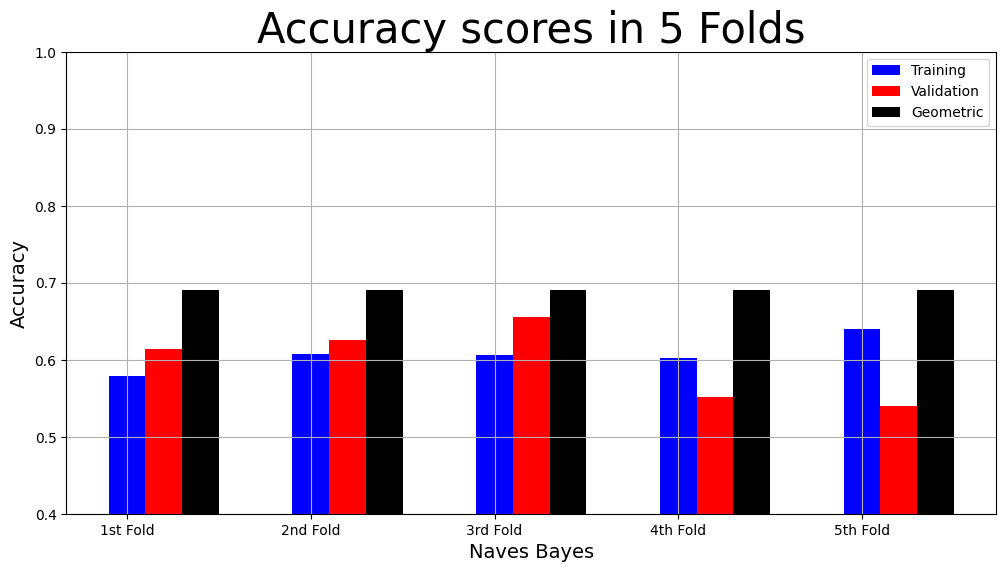

[1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2
 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 2
 2 2 2 1 2 2 1 1 1 2 2 1 2 1 2 1 2 1 2 2 2 2 2 1 2 1 1 2 2 2 1 2 2 2 2 2 2
 2 1 1 1 1 2 1 2 2 1 1 1 2 2 2 1 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2
 1 1 2 2 2 2 2 1 2 1 2 2 2 1 2 2 1 1 2 2 1 2 2 1 1 1 1 2 2 2 2 2 2 2 1 2 1
 2 1 1 1 2 2 1 2 2 2 1 2 1 2 2 2 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 1
 1 1 1 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 1 1
 2 1 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 2 1 1 1 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 1 2 2
 2 1 1 1 1 1 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 2 1 2 2 1 1 1 1 2 1
 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2]


In [13]:
#PLOT NAVE BAYES 
model_name = "Naves Bayes"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",results["Training Accuracy scores"],results["Validation Accuracy scores"],results['geom_costum_score'])

print(results['Y_pred'])

In [14]:
C=np.arange(1,202,5).tolist()
C


[1,
 6,
 11,
 16,
 21,
 26,
 31,
 36,
 41,
 46,
 51,
 56,
 61,
 66,
 71,
 76,
 81,
 86,
 91,
 96,
 101,
 106,
 111,
 116,
 121,
 126,
 131,
 136,
 141,
 146,
 151,
 156,
 161,
 166,
 171,
 176,
 181,
 186,
 191,
 196,
 201]

In [15]:


C=np.arange(1,202,5).tolist()

#Hyperparameter C calculation
kernels=['linear']
param_grid = {'C': C,'kernel': kernels}

#input normalization data 
'''X_train_minmax'''
#target output
'''Y_train'''
svc = svm.SVC()
#svc.cv_results_.keys()
#svc = svm.SVC(kernel=kernel).fit(X, y)
#plotSVC(‘kernel=’ + str(kernel))
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25,random_state=42)
grid = GridSearchCV(svc, param_grid=param_grid,scoring='accuracy',refit=True ,cv=5,verbose=3)
grid.fit(X_train_minmax,Y_train)
print(grid.best_score_,grid.best_params_,grid.best_estimator_)
#print(grid.cv_results_)
#print(grid.cv_results_.keys())
#print("Training Accuracy scores:",grid.cv_results_['mean_train_score'].mean()*100)
print("Testing Accuracy scores:",grid.cv_results_['mean_test_score'].mean()*100)



#CGgrid = np.logspace(-15,15,num=10,base=2)
#param_grid_svm = {'C': CGgrid ,
                  #'gamma': CGgrid}
#grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search_svm.fit(X, y)

#print(grid_search_svm.best_score_)     
#print(grid_search_svm.best_params_)



Fitting 5 folds for each of 41 candidates, totalling 205 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.693 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.693 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.701 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.701 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.701 total time=   0.0s
[CV 1/5] END ................C=6, kernel=linear;, score=0.693 total time=   0.0s
[CV 2/5] END ................C=6, kernel=linear;, score=0.693 total time=   0.0s
[CV 3/5] END ................C=6, kernel=linear;, score=0.701 total time=   0.0s
[CV 4/5] END ................C=6, kernel=linear;, score=0.701 total time=   0.0s
[CV 5/5] END ................C=6, kernel=linear;, score=0.678 total time=   0.0s
[CV 1/5] END ...............C=11, kernel=linear;, score=0.693 total time=   0.0s
[CV 2/5] END ...............C=11, kernel=linear

In [16]:
#Gamma me step 0.5 sto diastima 10
gamma=np.arange(0.5, 10.5, 0.5).tolist()
kernels=['rbf']
param_grid = {'C':[1.0] ,'gamma':gamma,'kernel': kernels}


  #svc = svm.SVC(kernel=kernel).fit(X, y)
  #plotSVC(‘kernel=’ + str(kernel))
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25,random_state=42)
grid = GridSearchCV(svc,param_grid,scoring='accuracy',refit=True,cv=5,verbose=3)
grid.fit(X_train_minmax,Y_train)
print(grid.best_score_,grid.best_params_,grid.best_estimator_)
#print(grid.cv_results_)
#print(grid.cv_results_.keys())
#print("Training Accuracy scores:",grid.cv_results_['mean_train_score'].mean()*100)
print("Testing Accuracy scores:",grid.cv_results_['mean_test_score'].mean()*100)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......C=1.0, gamma=0.5, kernel=rbf;, score=0.705 total time=   0.0s
[CV 2/5] END ......C=1.0, gamma=0.5, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END ......C=1.0, gamma=0.5, kernel=rbf;, score=0.701 total time=   0.0s
[CV 4/5] END ......C=1.0, gamma=0.5, kernel=rbf;, score=0.701 total time=   0.0s
[CV 5/5] END ......C=1.0, gamma=0.5, kernel=rbf;, score=0.690 total time=   0.0s
[CV 1/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.670 total time=   0.0s
[CV 2/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.713 total time=   0.0s
[CV 5/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.678 total time=   0.0s
[CV 1/5] END ......C=1.0, gamma=1.5, kernel=rbf;, score=0.670 total time=   0.0s
[CV 2/5] END ......C=1.0, gamma=1.5, kernel=rbf

In [17]:
#SVM MODEL WITH BEST PARAMETERS


#MODEL for SVM
svc = svm.SVC(kernel='rbf',C=1.0,gamma=2.5)
kf = KFold(n_splits=5)

#decision__result with callback functon
svm_results= cross_validation(svc, X_train_minmax, Y_train, kf)

#MEAN 
Training_acc=svm_results["Mean Training Accuracy"]
Validation_Acc=svm_results["Mean Validation Accuracy"]

#PREDICTION ACCURACY WITH X_TEST && Y_TEST
pred_accuracy=svm_results['Test_accuracy_score']
pred_accuracy
#Geometric Mean score
Geom =svm_results['geometric_mean_score']
geom_list=[Geom]*5

print(f'TRAINING ACCURACY :{Training_acc}'"\n",f'VALIDATION ACCURACY :{Validation_Acc}'"\n",f'PREDICTION ACCURACY WITH TEST DATA:{pred_accuracy}'"\n",F'GEOMETRIC_MEAN_SCORE:{Geom}'"\n",F'GEOMETRIC_COSTUM_SCORE:{svm_results["geom_costum_score"]}')


REPORT CLASSIFICATION FOR train data with repeating 5fold:               precision    recall  f1-score   support

           1       0.72      0.90      0.80       305
           2       0.44      0.19      0.26       132

    accuracy                           0.68       437
   macro avg       0.58      0.54      0.53       437
weighted avg       0.63      0.68      0.64       437

TRAINING ACCURACY :76.77363896848138
 VALIDATION ACCURACY :68.88453500522466
 PREDICTION ACCURACY WITH TEST DATA:0.7671232876712328
 GEOMETRIC_MEAN_SCORE:0.4117318300192113
 GEOMETRIC_COSTUM_SCORE:0.5422379533035271


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


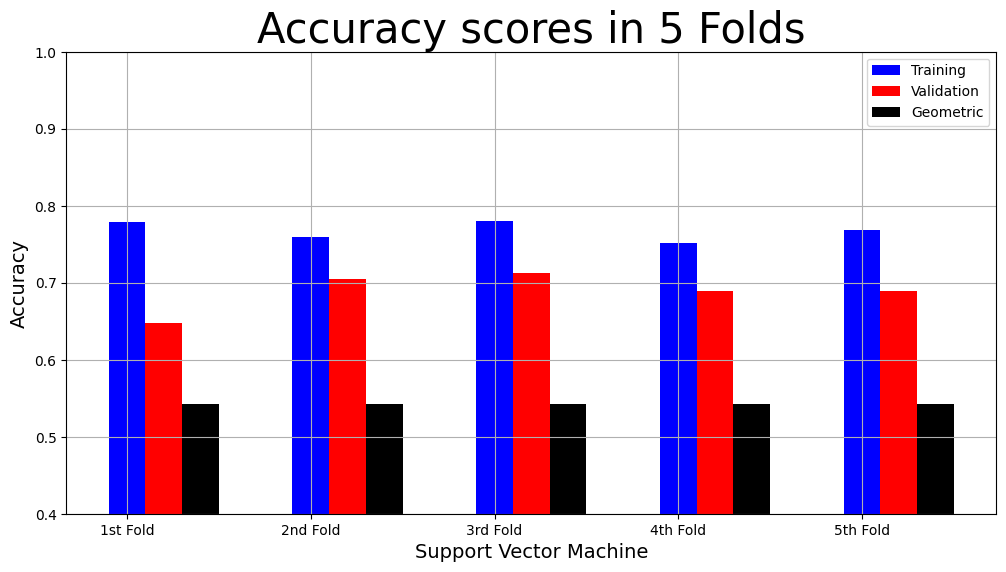

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1
 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1]


In [18]:
#PLOT SVM
model_name = "Support Vector Machine"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",svm_results["Training Accuracy scores"],svm_results["Validation Accuracy scores"],svm_results['geom_costum_score'])

print(svm_results['Y_pred'])


In [19]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(3, 16)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train_minmax, Y_train)

print(knn_gscv.best_params_,knn_gscv.best_score_)


{'n_neighbors': 6} 0.665987460815047


In [20]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=12)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train_minmax, Y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.625      0.625      0.68965517 0.72413793 0.5862069 ]
cv_scores mean:0.65


In [21]:
#MODEL for k-neigh
knn_cv = KNeighborsClassifier(n_neighbors=14)
kf = KFold(n_splits=5)

#decision__result with callback functon
knn_results= cross_validation(knn_cv, X_train_minmax, Y_train, kf)

#MEAN 
Training_acc=knn_results["Mean Training Accuracy"]
Validation_Acc=knn_results["Mean Validation Accuracy"]

#PREDICTION ACCURACY WITH X_TEST && Y_TEST
pred_accuracy=knn_results['Test_accuracy_score']
pred_accuracy
#Geometric Mean score
Geom =knn_results['geometric_mean_score']
geom_list=[Geom]*5

print(f'TRAINING ACCURACY :{Training_acc}'"\n",f'VALIDATION ACCURACY :{Validation_Acc}'"\n",f'PREDICTION ACCURACY WITH TEST DATA:{pred_accuracy}'"\n",F'GEOMETRIC_MEAN_SCORE:{Geom}'"\n",F'GEOMETRIC_COSTUM_SCORE:{knn_results["geom_costum_score"]}')

REPORT CLASSIFICATION FOR train data with repeating 5fold:               precision    recall  f1-score   support

           1       0.71      0.84      0.77       305
           2       0.37      0.22      0.27       132

    accuracy                           0.65       437
   macro avg       0.54      0.53      0.52       437
weighted avg       0.61      0.65      0.62       437

TRAINING ACCURACY :71.45329512893981
 VALIDATION ACCURACY :65.91692789968651
 PREDICTION ACCURACY WITH TEST DATA:0.726027397260274
 GEOMETRIC_MEAN_SCORE:0.42858029939013215
 GEOMETRIC_COSTUM_SCORE:0.5278812717337308


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


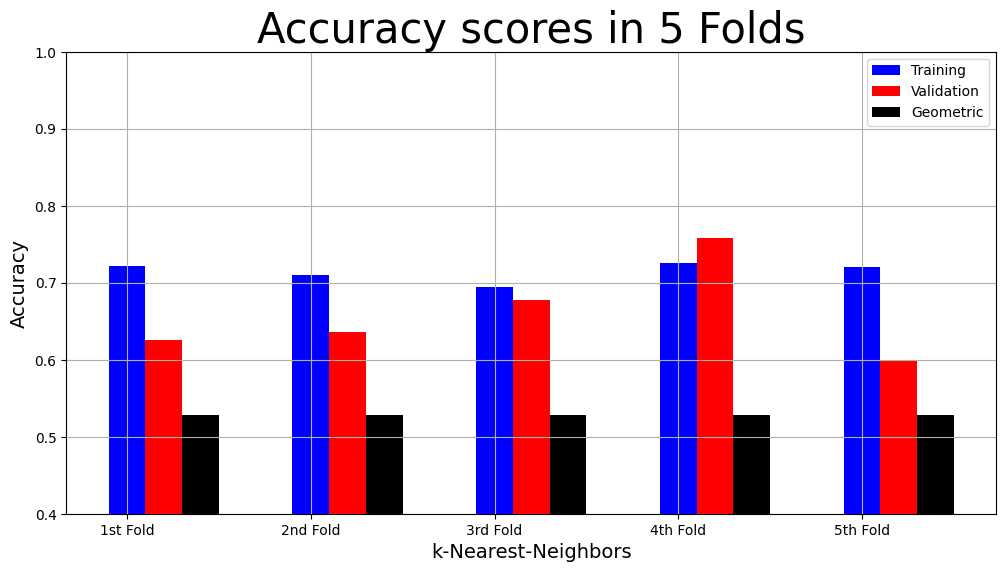

[1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 2 1 2 2 2 1 1 2 1 1 1 1 1 2 1 1 2 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 1 1 1 1 1 2 2 1 2 1 1 2 1 1
 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 2 1 1 2 1 2 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


In [22]:
#PLOT K-NEIGH
model_name = "k-Nearest-Neighbors"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",knn_results["Training Accuracy scores"],knn_results["Validation Accuracy scores"],knn_results['geom_costum_score'])

print(knn_results['Y_pred'])

In [23]:
'''Geometric Mean = sqrt (Sensitivity * Specificity)
sensitivity = sklearn.recall_score(Y_tr , pred)
specificity = sklearn.recall_score(np.logical_not(true) , np.logical_not(pred)) '''
age,tb_bilirubin,DB_Bilirubin,Alkaline_Phosphotase,Sgot,Protiens,Albumin,Albumin_Globulin = np.mean(X_data['Age']), np.mean(X_data['Tb_Bilirubin']), np.mean(X_data['DB_Bilirubin']), np.mean(X_data['Alkaline_Phosphotase']), np.mean(X_data['Sgot']),np.mean(X_data['Protiens']), np.mean(X_data['Albumin']),np.mean(X_data['Albumin_Globulin'])

In [24]:
#ERWTIMA 5
X_data



,Age,Gender,Tb_Bilirubin,DB_Bilirubin,Alkaline_Phosphotase,sgpt,Sgot,Protiens,Albumin,Albumin_Globulin
0,65,1,0.530628,0.095310,187,16,18,2.054124,1.458615,0.641854
1,62,0,2.476538,1.871802,699,64,100,2.140066,1.435085,0.553885
2,62,0,2.116256,1.629241,490,60,68,2.079442,1.458615,0.636577
3,58,0,0.693147,0.336472,182,14,20,2.054124,1.481605,0.693147
4,72,0,1.589235,1.098612,195,27,59,2.116256,1.223775,0.336472
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.405465,0.095310,500,20,34,1.931521,0.955511,0.314811
579,40,0,0.470004,0.095310,98,35,31,1.945910,1.435085,0.741937
580,52,0,0.587787,0.182322,245,48,49,2.001480,1.435085,0.693147
581,31,0,0.832909,0.405465,184,29,32,2.054124,1.481605,0.693147


In [25]:
#ERWTIMA 5 
#STUDENT T-TEST

age,Tb_Bilirubin,DB_Bilirubin,Alkaline_Phosphotase,sgpt,sgot,Protiens,Albumin,Albumin_Globulin=csv.Age,csv.Tb_Bilirubin,csv.DB_Bilirubin,csv.Alkaline_Phosphotase,csv['sgpt '],csv.Sgot,csv.Protiens,csv.Albumin,csv.Albumin_Globulin
print(shapiro(age))
print(shapiro(Tb_Bilirubin))
print(shapiro(DB_Bilirubin))
print(shapiro(Alkaline_Phosphotase))
print(shapiro(sgpt))
print(shapiro(sgot))
print(shapiro(Protiens))
print(shapiro(Albumin))
print(shapiro(Albumin_Globulin))

skewed = ['Alkaline_Phosphotase', 'DB_Bilirubin', 'Tb_Bilirubin', 'sgpt ', 'Sgot']
X_data =X_data.drop(columns=['Age' , 'Gender' , 'Protiens','Albumin','Albumin_Globulin'])
X_data

#Create Input && output data 
X_data = csv.drop('Disease',axis=1)
Y_data = csv['Disease']


ShapiroResult(statistic=0.9921649694442749, pvalue=0.003669116646051407)
ShapiroResult(statistic=0.45977210998535156, pvalue=1.5773978206485132e-38)
ShapiroResult(statistic=0.5295112133026123, pvalue=1.1563177719145935e-36)
ShapiroResult(statistic=0.5850895643234253, pvalue=5.217479889760206e-35)
ShapiroResult(statistic=0.32765698432922363, pvalue=1.402699762789142e-41)
ShapiroResult(statistic=0.2802243232727051, pvalue=1.4839750737199813e-42)
ShapiroResult(statistic=0.9921780824661255, pvalue=0.0037137106992304325)
ShapiroResult(statistic=0.9927358031272888, pvalue=0.0062446389347314835)
ShapiroResult(statistic=0.9461857080459595, pvalue=1.0292079824026149e-13)


In [26]:
#split dataset to train and test data 
X_train,X_test,Y_train,Y_test =train_test_split(X_data,Y_data,test_size=0.25)

def preprocessing(X_train,Y_train,X_test,Y_test,type="MinMax"):

            #NORMALIZATION#
    if type == "Normalization":
        X_train_normalized = tf.keras.utils.normalize(X_train)
        X_test_normalized = tf.keras.utils.normalize(X_test)
        return X_train_normalized,Y_train,X_test_normalized,Y_test

            #NORM-WITH MINMAX#
    elif type == "MinMax":
        scaler = MinMaxScaler(feature_range=(-1, 1))
        X_train_minmax = scaler.fit_transform(X_train)
        X_test_minmax = scaler.fit_transform(X_test)
        return X_train_minmax , Y_train ,X_test_minmax ,Y_test

X_train_minmax,Y_train,X_test_minmax,Y_test=preprocessing(X_train,Y_train,X_test,Y_test,type="MinMax")
print(X_train_minmax.shape,X_test_minmax.shape,Y_train.shape,Y_test.shape)

(437, 10) (146, 10) (437,) (146,)


In [27]:
#SVM MODEL WITH BEST PARAMETERS

#MODEL for SVM
svc = svm.SVC(kernel='rbf',C=1.0,gamma=2.5)
kf = KFold(n_splits=5)

#decision__result with callback functon
svm_results= cross_validation(svc, X_train_minmax, Y_train, kf)

#MEAN 
Training_acc=svm_results["Mean Training Accuracy"]
Validation_Acc=svm_results["Mean Validation Accuracy"]

#PREDICTION ACCURACY WITH X_TEST && Y_TEST
pred_accuracy=svm_results['Test_accuracy_score']
pred_accuracy
#Geometric Mean score
Geom =svm_results['geometric_mean_score']
geom_list=[Geom]*5

print(f'TRAINING ACCURACY :{Training_acc}'"\n",f'VALIDATION ACCURACY :{Validation_Acc}'"\n",f'PREDICTION ACCURACY WITH TEST DATA:{pred_accuracy}'"\n",F'GEOMETRIC_MEAN_SCORE:{Geom}'"\n",F'GEOMETRIC_COSTUM_SCORE:{svm_results["geom_costum_score"]}')



REPORT CLASSIFICATION FOR train data with repeating 5fold:               precision    recall  f1-score   support

           1       0.73      0.96      0.83       317
           2       0.36      0.07      0.11       120

    accuracy                           0.71       437
   macro avg       0.55      0.51      0.47       437
weighted avg       0.63      0.71      0.63       437

TRAINING ACCURACY :77.05804338927548
 VALIDATION ACCURACY :71.17032392894463
 PREDICTION ACCURACY WITH TEST DATA:0.684931506849315
 GEOMETRIC_MEAN_SCORE:0.2524329563990025
 GEOMETRIC_COSTUM_SCORE:0.5112513144058886


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


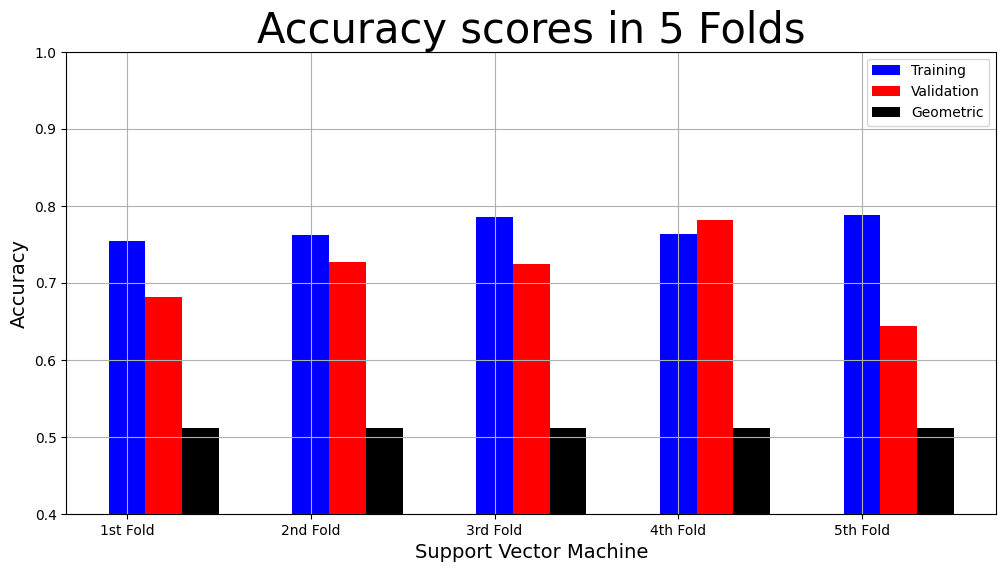

[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
#PLOT SVM
model_name = "Support Vector Machine"

plot_result(model_name,"Accuracy","Accuracy scores in 5 Folds",svm_results["Training Accuracy scores"],svm_results["Validation Accuracy scores"],svm_results['geom_costum_score'])

print(svm_results['Y_pred'])